### AB Test Project!

Data source: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing?select=marketing_AB.csv

Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

#### Questions we would like to answer

* 1 - Is there a association between the number of times a client sees an advertisement and their probability of being converted?

* 2 - In terms of effectiveness, how does private advertisement compare to public advertisement?

* 3 - Does the time of day (broken down into early morning, morning, afternoon, and evening) impact the success of a campaign?

* 4 - Does the day of the week have an impact on the success of a campaign?

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np

#### Importing our modules

In [2]:
from MODULES.cleaning_data import cleaning_data
from MODULES.descriptive_analyses import descriptive_analyses
from MODULES.logit_regression import logit_transformation
from MODULES.examining_variables import continuous_viz
from MODULES.normality_test import KS_test
from MODULES.MW_test import MW_test
from MODULES.chi2_test import chi2_test
from MODULES.item3_crosstab import CrossTab_Item3
from MODULES.item4_crosstab import CrossTab_Item4

#### Reading data with pandas

In [3]:
df = pd.read_csv('marketing_AB.csv')

#### Cleaning Data

In [4]:
df = cleaning_data(df)

#### Descriptive Analysis

Descriptive analyses summary!

The dataset contains 588,101 observations. We identified a conversion rate of 2.52%, indicating that the campaign was successful
with a minority of clients. Specifically, more than 97% of clients were not converted. The private campaign was seen by 96% of the
observations, but we did not observe significant differences between groups.

Examining the contingency table, we see that the percentage of converted clients was 96% for those who did not see the private
advertisement, and 97% for those who did see it. On average, each person saw the advertisement 24.84 times. The campaign was
visible on any day of the week, but Friday had the most campaigns published, while Tuesday had the least. We also found that the
most popular time for vehicle advertising was the afternoon, followed by the night. As expected, the least popular period for
advertisement exhibition was dawn.

Finally, using the contingency table, we observed a relationship between the total number of advertisements seen and the variable
indicating whether the client was converted. The average number of advertisements seen by clients who were not converted was 23.29,
while for clients who were converted, the average was 83.89. This difference was statistically significant.

In [5]:
descriptive_analyses(df)

Beginning of the descriptive analysis!
--------------------------------------------------
Dataset size: 588101!
--------------------------------------------------
Converted clients percentage: 2.52%
Not converted clients percentage: 97.48%
--------------------------------------------------
Percentage of clients subject to private advertisement: 96.00%
Percentage of clients subject to public advertisement: 4.00%
--------------------------------------------------
Quantity of advertisement seen by person, on average: 24.82
--------------------------------------------------
The percentage of total advertisements for each day of the week!
Friday       15.75%
Monday       14.81%
Sunday       14.52%
Thursday     14.11%
Saturday     13.89%
Wednesday    13.76%
Tuesday      13.17%
Name: most_ads_day, dtype: object
--------------------------------------------------
The percentage of total advertisements (early morning, morning, afternoon and evening)
12h - 17h    43.84%
18h - 23h     28.6%
6h - 1

#### Investigation of total_ads variable

We have a continuous variable that indicates the number of advertisements each client has seen. To determine whether this variable is normally distributed, we can use several methods such as kernel density graph, QQ-plot, and the Kolmogorov-Smirnov test.

The kernel density graph and QQ-plot show that the distribution of the data is right skewed and not normal. The Kolmogorov-Smirnov test confirms this by rejecting the null hypothesis, indicating no evidence of normality. It is worth noting that this test is appropriate for large datasets.

Overall, based on these findings, we can conclude that the variable indicating the number of advertisements seen by each client is not normally distributed.

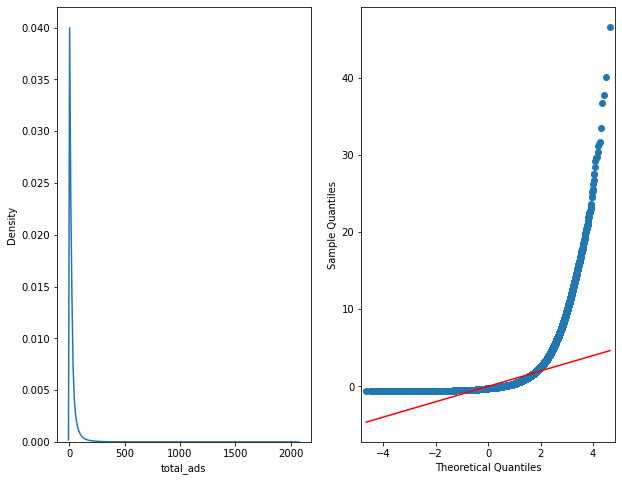

In [6]:
continuous_viz(df, 'total_ads')

In [7]:
KS_test(df, 'total_ads')

Reject H0! No evidence of normality! p-value = 0.0


#### Question 1 - Is there a association between the number of times a client sees an advertisement and their probability of being converted?

To test the relationship between the number of times a client saw the advertisement and their probability of conversion, we used a non-parametric Mann-Whitney test. This was because we found no evidence of normality in the distribution of the variable. The hypothesis of the test are.

* H0: The distribution of both populations are identical.
* H1: The distribution of populations is not identical

Our analysis showed that the p-value of the test was low enough to reject the null hypothesis, indicating that the number of advertisements seen by a client is associated with their probability of being converted. However, we acknowledge that other variables, known as confounding variables, could also be affecting the results. Therefore, further investigation is necessary to determine the extent of their impact.

In [8]:
MW_test(df, 'total_ads')

p-value: 0.0


#### Question 2 - In terms of effectiveness, how does private advertisement compare to public advertisement?

One possible strategy to investigate the impact of private versus public advertisements on the conversion rate is to compare the proportion of converted clients who saw each type of advertisement. We used the chi-squared independence test, which is appropriate for analyzing categorical data with a large number of observations, to compare the proportions of these two groups.

Our analysis revealed that there was no significant difference between the proportions of converted clients who saw private versus public advertisements. Thus, we lack sufficient evidence to support the hypothesis that private advertisements have a significant effect on the conversion rate.

In [9]:
chi2_test(df, 'converted', 'groups', 1, 0)

Proportion of converted within clients in group one: 2.55%
Proportion of converted within clients in group two: 1.79%
P-value = 0.000000! We can reject the null hypothesis. There is a significant difference between the proportions!


#### Question 3 - Does the time of day (broken down into early morning, morning, afternoon, and evening) impact the success of a campaign?

We have observed that almost 44% of campaigns are published between 12 p.m. and 5 p.m., making it the most popular time period for campaign deployment. The evening and morning hours follow closely, with 28.6% and 24.19%, respectively. Conversely, only 3.37% of campaigns are published in the early morning. However, it's important to consider whether the time of day when a campaign is published has a significant impact on its conversion rate. We will conduct tests to investigate the impact of advertising timing on conversion rates.

In [10]:
# Instantiating the class
ContingencyTable_Q3 = CrossTab_Item3(df, 'most_ads_hour')

# Presenting the results
ContingencyTable_Q3.crosstab_Q3

converted,0,1
most_ads_hour,,
Afternoon,97.26%,2.74%
Evening,97.28%,2.72%
Morning,97.92%,2.08%
Early Morning,98.70%,1.30%


#### Question 4

We are interested in analyzing the conversion rates associated with each day of the week. Our goal is to determine whether there are significant differences between these conversion rates, which would inform us whether certain days may be more effective than others for advertising.

In [12]:
# Instantiating the class
ContingencyTable_Q4 = CrossTab_Item4(df, 'most_ads_day')

# Presenting the results
ContingencyTable_Q4.crosstab_Q4

converted,0,1
most_ads_day,,
Monday,96.72%,3.28%
Tuesday,97.02%,2.98%
Wednesday,97.51%,2.49%
Sunday,97.55%,2.45%
Friday,97.78%,2.22%
Thursday,97.84%,2.16%
Saturday,97.89%,2.11%


#### Logit

In [14]:
logit_transformation(df)

Optimization terminated successfully.
         Current function value: 0.108269
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               588101
Model:                          Logit   Df Residuals:                   588089
Method:                           MLE   Df Model:                           11
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                 0.08076
Time:                        12:35:57   Log-Likelihood:                -63673.
converged:                       True   LL-Null:                       -69267.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.7040      0.022   -165.843      0.000      -3.748      -3.660
total_ads         0.0103   9.91e-05    103.404      0.000       0.010       0.010
Public_Ad        -0.3853      0.052     -7.473      0.000      -0.486      -0.284
Early Morning    -0.8127      0.067    -12.154      0.000      -0.944      -0.682
Morning          -0.3296      0.023    -14.282      0.000      -0.375      -0.284
Evening           0.0151      0.020      0.762      0.446      -0.024       0.054
Tuesday          -0.0322      0.029     -1.098      0.272      -0.090       0.025
Wednesday        -0.2633      0.031     -8.590      0.000      -0.323      -0.203
Sunday           -0.2525      0.030     -8.400      0.000      -0.311      -0.194
Friday           -0.4633      0.031    -15.106      0.000      -0.523      -0.403
Thursday         -0.4040      0.032    -12.772      0.000      -0.466      -0.342
Saturday         -0.4423      0.032    -13.843      0.000      -0.505      -0.380
=================================================================================
"""